# Exploration : Régression Linéaire From Scratch

Ce notebook explore en détail notre implémentation de la régression linéaire. Nous allons :
1. Visualiser les données.
2. Entraîner le modèle.
3. **Analyser la courbe de perte** pour voir comment l'algorithme apprend.
4. Visualiser la droite de régression finale.

In [7]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Configuration pour de jolis graphiques
%matplotlib inline
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('__file__'), '..', '..', 'src')))

from mlfs.supervised.regression.linear_regression import LinearRegression
from mlfs.utils.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Générer les mêmes données que dans l'exemple
def generate_linear_data(n_samples=200, noise=20):
    np.random.seed(42)
    X = 2 * np.random.rand(n_samples, 1)
    y = 5 + 15 * X + np.random.randn(n_samples, 1) * noise
    return X, y

X, y = generate_linear_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Données d'entraînement: {X_train.shape}")
print(f"Données de test: {X_test.shape}")

Données d'entraînement: (160, 1)
Données de test: (40, 1)


### Visualisation des Données

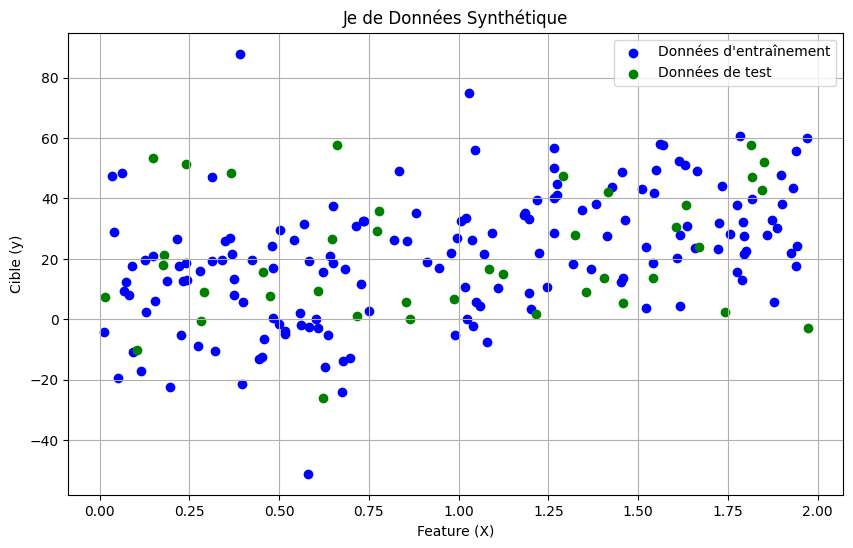

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Données d\'entraînement')
plt.scatter(X_test, y_test, color='green', label='Données de test')
plt.xlabel('Feature (X)')
plt.ylabel('Cible (y)')
plt.title('Je de Données Synthétique')
plt.legend()
plt.grid(True)
plt.show()

### Entraînement du Modèle et Analyse de la Perte

Nous entraînons le modèle et traçons l'évolution de l'erreur (MSE) à chaque itération. Une courbe qui diminue est le signe que l'algorithme apprend correctement.

Entraînement terminé. Perte finale (MSE): 359.9003


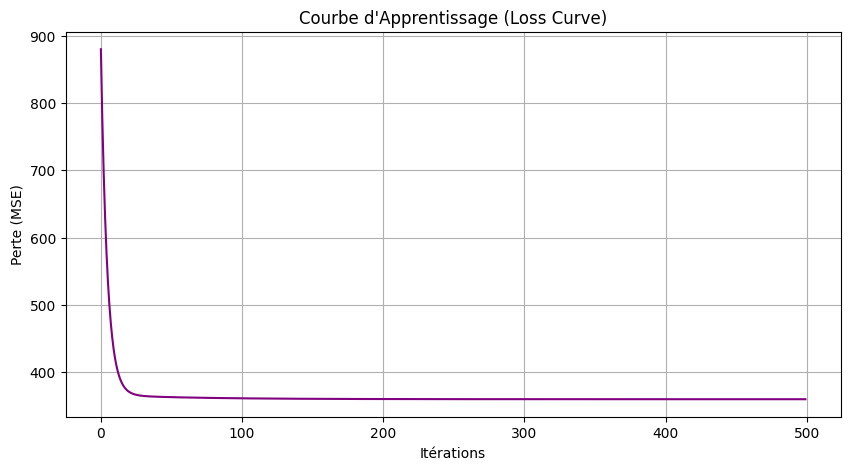

In [9]:
model = LinearRegression(learning_rate=0.05, n_iterations=500)
model.fit(X_train, y_train)

# Visualiser la courbe de perte
plt.figure(figsize=(10, 5))
plt.plot(range(model.n_iterations), model.loss_history, color='purple')
plt.xlabel('Itérations')
plt.ylabel('Perte (MSE)')
plt.title('Courbe d\'Apprentissage (Loss Curve)')
plt.grid(True)
plt.show()

### Visualisation du Résultat Final

Maintenant, nous traçons la droite de régression que notre modèle a apprise.

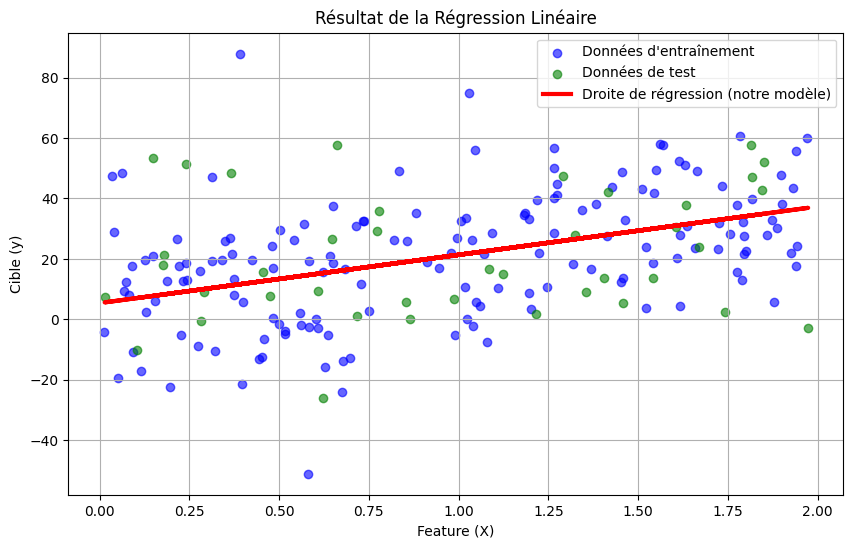

Erreur Quadratique Moyenne sur le jeu de test : 433.40


In [10]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Données d\'entraînement')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Données de test')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Droite de régression (notre modèle)')
plt.xlabel('Feature (X)')
plt.ylabel('Cible (y)')
plt.title('Résultat de la Régression Linéaire')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f"Erreur Quadratique Moyenne sur le jeu de test : {mse:.2f}")